In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# Завантажуємо датасет
df = pd.read_csv('winequality-red.csv')
df_copy = df.copy()

print(f'Кількість зразків: {df_copy.shape[0]}')
print(f'Кількість ознак: {df_copy.shape[1]}')

Кількість зразків: 1599
Кількість ознак: 12


In [3]:
# 2. Підготувати дані відповідно до умов алгоритму PCA

print('Перевірка пропущених значень у кожному стовпчику:')
print(df_copy.isnull().sum())

# Відокремлюємо ознаки та цільову змінну
X = df_copy.drop('quality', axis=1)
y = df_copy['quality']

# Додаткова перевірка: Кількість нульових значень у кожній ознаці
print('\nКількість нульових значень у кожній ознаці:')
print((X == 0).sum())

# Заповнюємо нульові значення середнім значенням відповідної колонки (тільки якщо треба)
# У цьому випадку вирішуємо заповнювати тільки там, де це має сенс
X_no_zeros = X.copy()
for column in X.columns:
    zero_count = (X[column] == 0).sum()
    if zero_count > 0:
        mean_val = X[X[column] != 0][column].mean()  # середнє без нулів
        X_no_zeros[column] = X[column].replace(0, mean_val)

# Стандартизація ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_no_zeros)

print(f'\nРозмірність стандартизованих даних: {X_scaled.shape}')


Перевірка пропущених значень у кожному стовпчику:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Кількість нульових значень у кожній ознаці:
fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

Розмірність стандартизованих даних: (1599, 11)


In [4]:
# 3. Застосувати алгоритм PCA
pca = PCA() 
X_pca = pca.fit_transform(X_scaled) 

# Виведемо базову інформацію
print('Розмірність даних після PCA:', X_pca.shape)

Розмірність даних після PCA: (1599, 11)


In [10]:
# 4. Проаналізувати отримані результати щодо отриманих факторів та їх логічності

# Пояснена дисперсія та кумулятивна дисперсія
explained_variance = pca.explained_variance_ratio_  # Пояснена дисперсія кожною компонентою
cumulative_explained_variance = np.cumsum(explained_variance)  # Кумулятивна дисперсія

# Створимо DataFrame для відображення поясненої та кумулятивної дисперсії
explained_df = pd.DataFrame({
    'Компонента': np.arange(1, len(explained_variance) + 1),
    'Пояснена дисперсія': explained_variance,
    'Кумулятивна дисперсія': cumulative_explained_variance
})

print('Пояснена дисперсія та кумулятивна дисперсія для кожної компоненти:')
print(explained_df)

# Отримуємо факторні навантаження
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=X.columns)

print('\nФакторні навантаження ознак на головні компоненти:')
print(loadings)

# Аналізуємо логічність факторних навантажень для кожної компоненти
for i in range(len(pca.components_)):
    print(f'\nАналіз компоненти PC{i+1}:')
    print('Ознаки з найбільшими навантаженнями:')
    print(loadings.iloc[:, i].sort_values(ascending=False).head(5))  # Вивести 5 найбільших значень
    print('Ознаки з найменшими навантаженнями:')
    print(loadings.iloc[:, i].sort_values(ascending=True).head(5))  # Вивести 5 найменших значень


Пояснена дисперсія та кумулятивна дисперсія для кожної компоненти:
    Компонента  Пояснена дисперсія  Кумулятивна дисперсія
0            1            0.274811               0.274811
1            2            0.176081               0.450892
2            3            0.139530               0.590422
3            4            0.109976               0.700398
4            5            0.086853               0.787251
5            6            0.060028               0.847279
6            7            0.052720               0.899999
7            8            0.043090               0.943089
8            9            0.031094               0.974183
9           10            0.020426               0.994609
10          11            0.005391               1.000000

Факторні навантаження ознак на головні компоненти:
                           PC1       PC2       PC3       PC4       PC5  \
fixed acidity         0.497183 -0.104223 -0.112534 -0.236013 -0.107702   
volatile acidity     -0.227692  0.266


Власні значення (Eigenvalues):
[3.02481418 1.93809933 1.53579259 1.21049736 0.95598149 0.66071622
 0.58027914 0.47428549 0.34225233 0.22483197 0.05933349]

% Поясненої дисперсії (Explained Variance Ratio):
[0.27481114 0.17608066 0.13953019 0.10997639 0.08685306 0.06002755
 0.05271966 0.0430899  0.03109439 0.02042649 0.00539058]

Кумулятивна пояснена дисперсія (Cumulative Explained Variance):
[0.27481114 0.4508918  0.59042199 0.70039838 0.78725144 0.84727899
 0.89999864 0.94308854 0.97418293 0.99460942 1.        ]

Характеристики PCA:
    Компонента  Власні значення  % Пояснена дисперсія  \
0            1         3.024814              0.274811   
1            2         1.938099              0.176081   
2            3         1.535793              0.139530   
3            4         1.210497              0.109976   
4            5         0.955981              0.086853   
5            6         0.660716              0.060028   
6            7         0.580279              0.052720   
7  

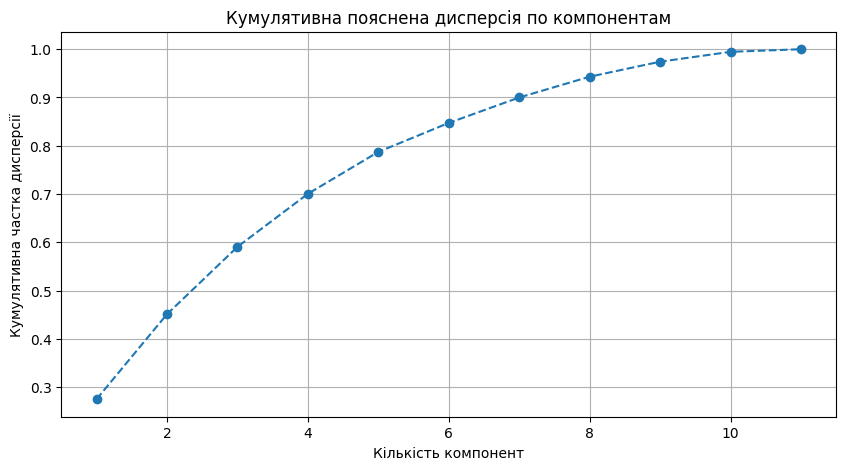

In [12]:
# 5. Вивести всі характеристики PCA для розуміння важливості ознак та їх внеску у кінцеві фактори (компоненти)
# Виведемо власні значення (Eigenvalues)
eigenvalues = pca.explained_variance_  # Власні значення
print("\nВласні значення (Eigenvalues):")
print(eigenvalues)

# Виведемо % поясненої дисперсії (Explained Variance Ratio)
explained_variance_ratio = pca.explained_variance_ratio_  # Пояснена дисперсія для кожної компоненти
print("\n% Поясненої дисперсії (Explained Variance Ratio):")
print(explained_variance_ratio)

# Виведемо кумулятивну пояснену дисперсію
cumulative_explained_variance = np.cumsum(explained_variance_ratio)  # Кумулятивна пояснена дисперсія
print("\nКумулятивна пояснена дисперсія (Cumulative Explained Variance):")
print(cumulative_explained_variance)

# Додатково можна вивести DataFrame з усіма характеристиками
pca_summary = pd.DataFrame({
    'Компонента': np.arange(1, len(explained_variance_ratio) + 1),
    'Власні значення': eigenvalues,
    '% Пояснена дисперсія': explained_variance_ratio,
    'Кумулятивна пояснена дисперсія': cumulative_explained_variance
})

print("\nХарактеристики PCA:")
print(pca_summary)

# Графік для кумулятивної поясненої дисперсії
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Кумулятивна пояснена дисперсія по компонентам')
plt.xlabel('Кількість компонент')
plt.ylabel('Кумулятивна частка дисперсії')
plt.grid()
plt.show()


In [15]:
# 6. Визначити оптимальну кількість головних компонент для подальшого аналізу
threshold = 0.90  # Поріг поясненої дисперсії, наприклад, 90%
optimal_components = np.argmax(cumulative_explained_variance >= threshold) + 1
print(f'Оптимальна кількість компонент для досягнення {threshold*100}% поясненої дисперсії: {optimal_components}')

Оптимальна кількість компонент для досягнення 90.0% поясненої дисперсії: 8


Accuracy: 0.5687

Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.10      0.18        10
           5       0.63      0.75      0.69       130
           6       0.53      0.56      0.55       132
           7       0.38      0.21      0.27        42
           8       1.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.76      0.27      0.28       320
weighted avg       0.57      0.57      0.55       320



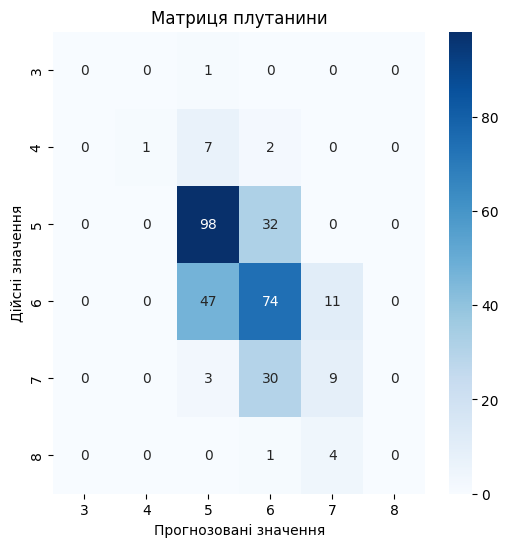

In [17]:
# 7. Взяти за основу будь-яку зі створених у попередніх практичних модель класифікації з оцінкою її якості
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Розділяємо дані на тренувальні та тестові
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Створення та навчання моделі логістичної регресії
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = model.predict(X_test)

# Оцінка якості моделі
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Оцінка за допомогою classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Побудова матриці плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Матриця плутанини')
plt.xlabel('Прогнозовані значення')
plt.ylabel('Дійсні значення')
plt.show()


In [21]:
# 8. Застосувати метод головних компонент до того ж набору даних на основі якого була побудована класифікаційна модель. Попередньо провести всі операції з підготовки даних, що необхідні для коректного застосування алгоритму.

# Розділяємо дані на X (ознаки) та y (цільова змінна)
X = df.drop('quality', axis=1)
y = df['quality']

# Стандартизуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=8)  # Вибираємо оптимальну кількість компонент (можна змінити залежно від результатів PCA)
X_pca = pca.fit_transform(X_scaled)

# Пояснена дисперсія
print("Пояснена дисперсія кожної компоненти:", pca.explained_variance_ratio_)
print("Кумулятивна пояснена дисперсія:", np.cumsum(pca.explained_variance_ratio_))

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

Пояснена дисперсія кожної компоненти: [0.28173931 0.1750827  0.1409585  0.11029387 0.08720837 0.05996439
 0.05307193 0.03845061]
Кумулятивна пояснена дисперсія: [0.28173931 0.45682201 0.59778051 0.70807438 0.79528275 0.85524714
 0.90831906 0.94676967]


LogisticRegression(max_iter=1000)

In [22]:
# 9. Результати методу головних компонент зберегти в новий масив та використати в якості входів до класифікаційної моделі.
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
# Виведення перших кількох рядків результату
print(X_pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.619530  0.450950 -1.774454  0.043740  0.067014  0.913921  0.161043   
1 -0.799170  1.856553 -0.911690  0.548066 -0.018392 -0.929714  1.009829   
2 -0.748479  0.882039 -1.171394  0.411021 -0.043531 -0.401473  0.539553   
3  2.357673 -0.269976  0.243489 -0.928450 -1.499149  0.131017 -0.344290   
4 -1.619530  0.450950 -1.774454  0.043740  0.067014  0.913921  0.161043   

        PC8  
0  0.282258  
1 -0.762587  
2 -0.597946  
3  0.455375  
4  0.282258  


Accuracy: 0.5719

Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.63      0.78      0.70       130
           6       0.54      0.55      0.54       132
           7       0.38      0.21      0.27        42
           8       1.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.76      0.26      0.25       320
weighted avg       0.58      0.57      0.54       320



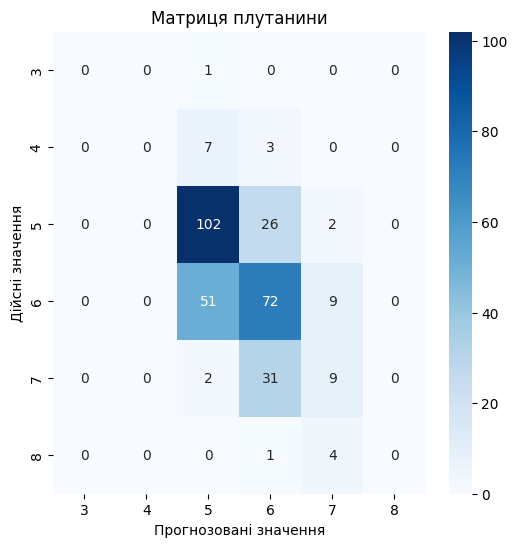

In [23]:
# 10. Оцінити якість моделі побудованої на основі нових даних.
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Оцінка за допомогою classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Побудова матриці плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Матриця плутанини')
plt.xlabel('Прогнозовані значення')
plt.ylabel('Дійсні значення')
plt.show()

Accuracy: 0.5719

Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       1.00      0.00      0.00        10
           5       0.63      0.78      0.69       130
           6       0.54      0.55      0.55       132
           7       0.38      0.21      0.27        42
           8       1.00      0.00      0.00         5

    accuracy                           0.57       320
   macro avg       0.76      0.26      0.25       320
weighted avg       0.58      0.57      0.54       320



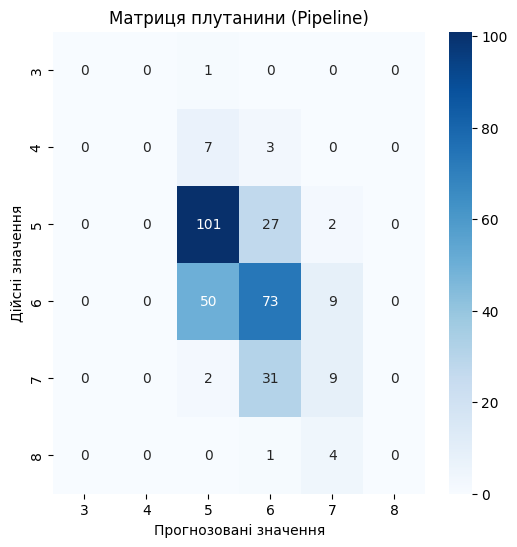

In [26]:
# 11. Об’єднати усі етапи роботи даними у конвеєр.

from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Створення конвеєра
pipeline = Pipeline([
    ('scaler', StandardScaler()),          # Стандартизація даних
    ('pca', PCA(n_components=8)),          # Застосування PCA
    ('log_reg', LogisticRegression(max_iter=1000))  # Логістична регресія
])

# Навчання моделі за допомогою конвеєра
pipeline.fit(X_train, y_train)

# Прогнозування на тестових даних
y_pred = pipeline.predict(X_test)

# Оцінка якості моделі
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Звіт про класифікацію
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Матриця плутанини
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Матриця плутанини (Pipeline)')
plt.xlabel('Прогнозовані значення')
plt.ylabel('Дійсні значення')
plt.show()

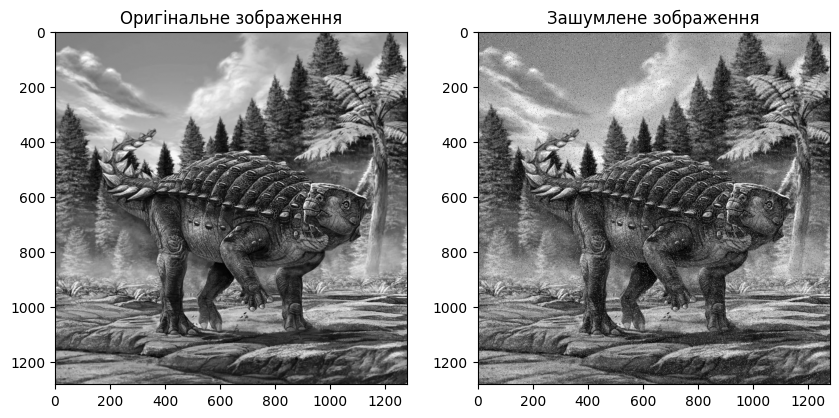

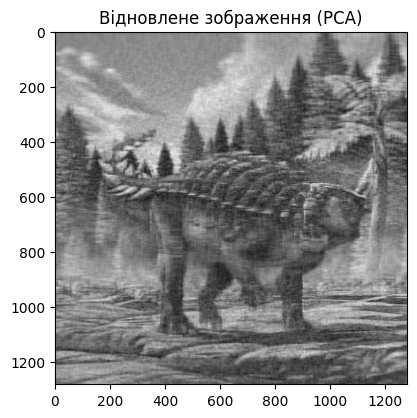

In [27]:
# 12. Застосувати алгоритм PSA для вирішення практичної задачі обробки зображень (наприклад зниження їх "зашумленості" для покращення роботи будь-якого з базових алгоритмів або нейромереж)
from skimage import io, color
from skimage.util import random_noise

# Завантажуємо приклад зображення (наприклад, зображення "супергероя")
image = io.imread('photo.jpg')

# Конвертуємо зображення в відтінки сірого
image_gray = color.rgb2gray(image)

# Додаємо шум до зображення
noisy_image = random_noise(image_gray, mode='s&p', amount=0.05)

# Візуалізуємо оригінальне і зашумлене зображення
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Оригінальне зображення")
plt.imshow(image_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Зашумлене зображення")
plt.imshow(noisy_image, cmap='gray')

plt.show()

# 1. Приведення зображення до формату, сумісного з PCA (перетворення в масив)
n_samples, n_features = noisy_image.shape
noisy_image_flat = noisy_image.reshape(n_samples, n_features)

# 2. Масштабування для застосування PCA
scaler = StandardScaler()
noisy_image_scaled = scaler.fit_transform(noisy_image_flat)

# 3. Застосування PCA для зниження розмірності
pca = PCA(n_components=50)  # Обираємо 50 головних компонент для збереження основної інформації
image_pca = pca.fit_transform(noisy_image_scaled)

# 4. Відновлення зображення з використанням тільки збережених компонент
image_reconstructed = pca.inverse_transform(image_pca)

# 5. Відновлене зображення після зниження шуму
image_reconstructed = scaler.inverse_transform(image_reconstructed)
image_reconstructed = image_reconstructed.reshape(n_samples, n_features)

# Візуалізуємо результат
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 2)
plt.title("Відновлене зображення (PCA)")
plt.imshow(image_reconstructed, cmap='gray')

plt.show()